In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [29]:
import pandas as pd

df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

print(df.to_string()) 

         lesion_id      image_id     dx    dx_type   age      sex     localization
0      HAM_0000118  ISIC_0027419    bkl      histo  80.0     male            scalp
1      HAM_0000118  ISIC_0025030    bkl      histo  80.0     male            scalp
2      HAM_0002730  ISIC_0026769    bkl      histo  80.0     male            scalp
3      HAM_0002730  ISIC_0025661    bkl      histo  80.0     male            scalp
4      HAM_0001466  ISIC_0031633    bkl      histo  75.0     male              ear
5      HAM_0001466  ISIC_0027850    bkl      histo  75.0     male              ear
6      HAM_0002761  ISIC_0029176    bkl      histo  60.0     male             face
7      HAM_0002761  ISIC_0029068    bkl      histo  60.0     male             face
8      HAM_0005132  ISIC_0025837    bkl      histo  70.0   female             back
9      HAM_0005132  ISIC_0025209    bkl      histo  70.0   female             back
10     HAM_0001396  ISIC_0025276    bkl      histo  55.0   female            trunk
11  

In [30]:
lesion_type_dict = {
    'nv': 'Melanocytic-nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign-keratosis-like-lesions',
    'bcc': 'Basal-cell-carcinoma',
    'akiec': 'Actinic-keratoses',
    'vasc': 'Vascular-lesions',
    'df': 'Dermatofibroma'
}

disease =[]
for i in range(len(df)):
    disease.append(lesion_type_dict[df.loc[i,"dx"]])
    
df['disease']=disease    

In [32]:
import os
from pathlib import Path

data_dir = Path('images')
os.makedirs(data_dir, exist_ok=True)

for dis in list(lesion_type_dict.values()):
    path = str(data_dir) + "/" + dis
    os.makedirs(path, exist_ok=True)


In [33]:
import shutil

for i in range(len(df)):
    f= Path('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/' + df.loc[i,"image_id"] +'.jpg')
    if os.path.isfile(f):
        shutil.copy(f, Path('images/' + df.loc[i,"disease"]))
    else:
        shutil.copy(Path('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/' + df.loc[i,"image_id"] +'.jpg'), Path('images/' + df.loc[i,"disease"]))
    if i%1000==0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [34]:
!pip install -q datasets transformers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [122]:
from huggingface_hub import notebook_login

notebook_login()

In [123]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [124]:
from datasets import load_dataset 

In [125]:
ds = load_dataset("imagefolder", data_dir=data_dir)

Resolving data files:   0%|          | 0/10015 [00:00<?, ?it/s]

In [126]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10015
    })
})

In [127]:
example = ds["train"][10]
example

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450>,
 'label': 0}

In [128]:
ds["train"].features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['Actinic-keratoses', 'Basal-cell-carcinoma', 'Benign-keratosis-like-lesions', 'Dermatofibroma', 'Melanocytic-nevi', 'Melanoma', 'Vascular-lesions'], id=None)}

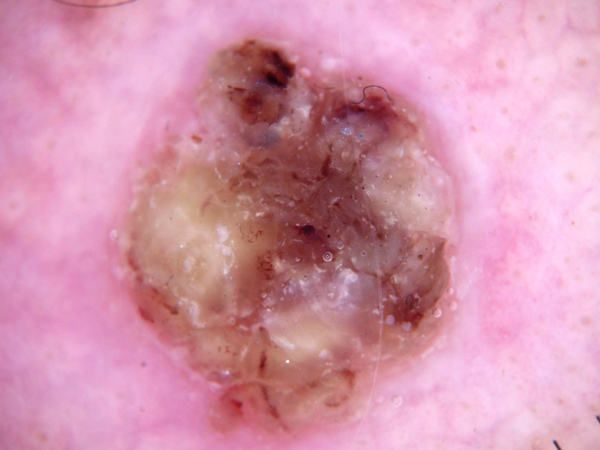

In [129]:
example['image']

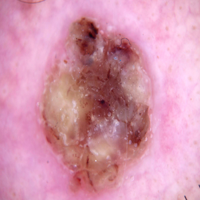

In [130]:
example['image'].resize((200, 200))

In [131]:
labels = ds["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[2]

'Benign-keratosis-like-lesions'

In [132]:
model_checkpoint = "microsoft/swin-tiny-patch4-window7-224" # pre-trained model from which to fine-tune
batch_size = 32 # batch size for training and evaluation

In [133]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(model_checkpoint)
feature_extractor

/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTFeatureExtractor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [134]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
train_transforms = Compose(
        [
            RandomResizedCrop(feature_extractor.size["height"]),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize(feature_extractor.size["height"]),
            CenterCrop(feature_extractor.size["height"]),
            ToTensor(),
            normalize,
        ]
    )

def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

In [135]:
# split up training into training + validation
splits = ds["train"].train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

In [136]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

In [137]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450>,
 'label': 4,
 'pixel_values': tensor([[[1.6838, 1.7180, 1.6324,  ..., 1.8722, 1.9064, 1.9235],
          [1.6495, 1.7352, 1.7352,  ..., 1.8893, 1.8037, 1.8893],
          [1.7523, 1.7694, 1.7180,  ..., 1.8893, 1.8550, 1.8722],
          ...,
          [1.6324, 1.6324, 1.5982,  ..., 1.8037, 1.7352, 1.7180],
          [1.6153, 1.6324, 1.5639,  ..., 1.8208, 1.6838, 1.6838],
          [1.6324, 1.5810, 1.5639,  ..., 1.7694, 1.7180, 1.7523]],
 
         [[0.4853, 0.5203, 0.3978,  ..., 0.6779, 0.6954, 0.6954],
          [0.5203, 0.5728, 0.4853,  ..., 0.6604, 0.6078, 0.6954],
          [0.6429, 0.6078, 0.5028,  ..., 0.7129, 0.6604, 0.6954],
          ...,
          [0.5203, 0.5028, 0.4853,  ..., 0.7829, 0.6779, 0.6604],
          [0.5203, 0.5028, 0.4503,  ..., 0.7829, 0.6254, 0.6078],
          [0.5028, 0.3978, 0.3803,  ..., 0.7829, 0.7479, 0.7479]],
 
         [[0.5834, 0.6182, 0.4962,  ..., 0.8622, 0.8971, 0.8622],
  

In [138]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint, 
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"{model_name}-finetuned-skin-cancer",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [140]:
from datasets import load_metric

metric = load_metric("accuracy")

/opt/conda/lib/python3.10/site-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [141]:
import numpy as np
# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [142]:
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [143]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [144]:
train_results = trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
0,0.923200,0.826318,0.711577
1,0.642700,0.646529,0.764471
2,0.547500,0.536986,0.805389
4,0.454700,0.446217,0.835329
5,0.400900,0.421840,0.848303
6,0.372200,0.394192,0.853293
8,0.307100,0.413611,0.849301
9,0.310300,0.382108,0.861277


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

In [147]:
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

In [151]:
from transformers import Trainer, TFAutoModel
model = TFAutoModel.from_pretrained('/kaggle/working/swin-tiny-patch4-window7-224-finetuned-skin-cancer')

# Save the model as a .h5 file
# Save the model using TensorFlow SavedModel format
model.save('/kaggle/working/swin_model_saved', save_format='tf')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFSwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFSwinModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFSwinModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFSwinModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSwinModel for predictions without further training.
